In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import warnings

from sklearn import metrics
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


In [70]:
for dirname, _, filenames in os.walk('/home/daftvm/workspace/mast1_ai/ydays/real_estate/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.filterwarnings('ignore')


/home/daftvm/workspace/mast1_ai/ydays/real_estate/real_estate.csv
/home/daftvm/workspace/mast1_ai/ydays/real_estate/real_estate.ipynb


In [71]:
df = pd.read_csv('real_estate.csv')
display(df)



,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [72]:
def analysis(data):
    return pd.DataFrame({"Data Type": data.dtypes, "Unique Count": data.apply(lambda x: x.nunique(), axis=0),
                         "Null Count": data.isnull().sum()})


In [73]:
analysis(df)


,Data Type,Unique Count,Null Count
No,int64,414,0
X1 transaction date,float64,12,0
X2 house age,float64,236,0
X3 distance to the nearest MRT station,float64,259,0
X4 number of convenience stores,int64,11,0
X5 latitude,float64,234,0
X6 longitude,float64,232,0
Y house price of unit area,float64,270,0


In [74]:
df_x = df.drop(['No', 'Y house price of unit area'], axis=1)
df_y = df['Y house price of unit area']


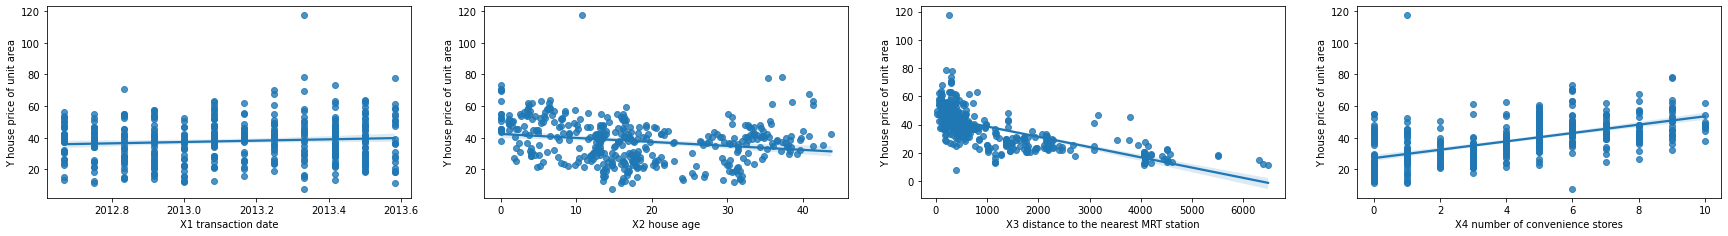

In [75]:
df_columns = df_x.drop(['X5 latitude', 'X6 longitude'], axis=1)
plt.figure(figsize=(30, 50))

for i in enumerate(df_columns):
    plt.subplot(12, 4, i[0]+1)
    sns.regplot(x=df_columns[i[1]], y=df_y, data=df)
    plt.xlabel(i[1])


In [76]:
df_x = df.iloc[:, :-1]
df_y = df.iloc[:, [-1]]


In [77]:
def preprocessing(degree):
    PolynomialConverter = PolynomialFeatures(degree=degree, include_bias=False)
    return PolynomialConverter


In [78]:
poly_convert = preprocessing(2)
df_prepro = poly_convert.fit(df_x)
df_prepro = poly_convert.transform(df_x)


In [79]:
scaler = StandardScaler()


In [80]:
x = scaler.fit_transform(df_x)
y = scaler.fit_transform(df_y)


In [91]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=.5)


In [92]:
ridge = Ridge(alpha=30)

ridge.fit(x_train, y_train)


Ridge(alpha=30)

In [93]:
Ridge(alpha=30)

pred = ridge.predict(x_test)


In [94]:
MAE = metrics.mean_absolute_error(y_test, pred)
MSE = metrics.mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)


In [95]:
print("Mean_Absolute_Error: ", MAE, "\nMean_Square_Error: ", MSE,
      "\nRoot_Mean_Square_Error: ", RMSE)


Mean_Absolute_Error:  0.4497257422796226 
Mean_Square_Error:  0.3273346619843977 
Root_Mean_Square_Error:  0.5721316823812485
